In [ ]:
%load_ext autoreload

import sys
import os

import numpy as np
nax = np.newaxis
import pandas as pd

from pathlib import Path 
path = Path("../spqubolib").resolve().as_posix()
sys.path.append(path)

from blob_experiment import build_q, generate_problem
from blob_plot import plot_problem
from blob2_plot import plot

In [ ]:
image_path = "images/blob2_small"

os.makedirs(image_path, exist_ok=True)

## Problem 2 (small problem for visualization)

## setting parameters

In [ ]:
#### setting parameters ####

# problem size
B, D, K, Nk = 11, 2, 7, 5 # = (B, D, K, M)
# problem parameter
Ainte, Acnt = 1, 50 # C = 50

## make problem

In [ ]:
%autoreload

rng = np.random.default_rng(0)

B_list = np.array([B] * D)
df_prob = generate_problem(rng, K, B_list, Nk)

num_points = df_prob.shape[0]
num_spins = num_points * K
print(f"points: {num_points}")
print(f"spins: {num_spins}")
print(f"spins**2: {num_spins**2}")

ret = []
for k in range(K):
    df_ = df_prob.copy()
    df_["k"] = k
    ret.append(df_)
ret = pd.concat(ret, axis=0)

q, _, _ = build_q(B, D, K, ret[list(np.arange(D)) + ["k"]].values, Ainte, Acnt)
q.set_mode("fourier")

possible_points: 121
possible_spins: 847
arr size: 5733
16 5
15 5
16 5
15 5
19 5
18 5
22 5
points: 35
spins: 245
spins**2: 60025
function_to_J_higher
build high_qmodel_sparse


## plot problem

In [ ]:
%autoreload

plot_problem(df_prob, B, f"{image_path}/blob_problem_small.png")

## plot mapping and interactions

In [5]:
print("raveled problem size:", q.Lx, q.Ly)
display(pd.DataFrame(q.J.ravel()).quantile([0.01,0.05,0.95,0.99]))
display(pd.DataFrame(q.get_f_J().ravel()).quantile([0.01,0.05,0.95,0.99]))

raveled problem size: 273 21


,0
0.01,0.00000
0.05,0.00000
0.95,0.72111
0.99,1.16619


,0
0.01,-91.958961
0.05,-52.916996
0.95,599.916748
0.99,599.954468


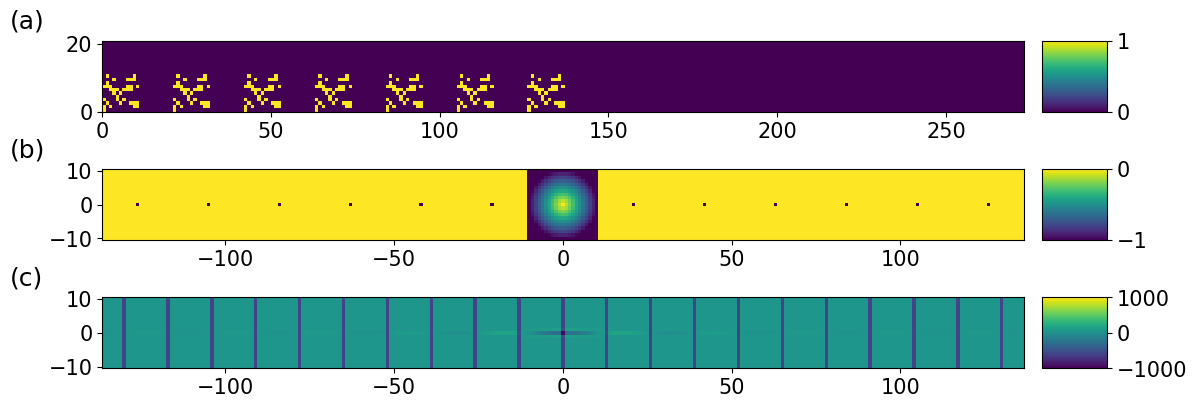

In [ ]:
%autoreload

plot(q, f"{image_path}/mapping_small.png")